In [19]:
import missingno
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path


In [6]:
data = Path('../data/raw/events.csv.gzip')
events = pd.read_csv(data, compression='gzip', parse_dates=['date'])

F:\miniconda\envs\odd\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
events.columns

Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')

In [9]:
events = events.assign(date = lambda df: df.date.dt.floor('h').dt.tz_localize('UTC').dt.tz_convert('America/Montevideo'))

In [11]:
events.shape

(2494423, 22)

In [14]:
2494423 * 22

54877306

In [13]:
events.isna().sum() / 2494423

date                  0.000000
event_id              0.000000
ref_type              0.000000
ref_hash              0.000000
application_id        0.000000
attributed            0.000000
device_countrycode    0.000000
device_os_version     0.590260
device_brand          0.532973
device_model          0.035265
device_city           0.753571
session_user_agent    0.004725
trans_id              0.999967
user_agent            0.442145
event_uuid            0.002044
carrier               0.752875
kind                  0.002044
device_os             0.736345
wifi                  0.447218
connection_type       0.754467
ip_address            0.000000
device_language       0.035206
dtype: float64

In [ ]:
device_os_version, device_city, trans_id, user_agent, device_brand, carrier, device_os, connection_type

In [15]:
events.apply(lambda x: x.nunique())

date                      216
event_id                  568
ref_type                    2
ref_hash               196049
application_id            269
attributed                  2
device_countrycode          1
device_os_version          81
device_brand              250
device_model             2624
device_city               127
session_user_agent       1460
trans_id                   13
user_agent               5111
event_uuid            2489324
carrier                    84
kind                      583
device_os                   4
wifi                        2
connection_type             3
ip_address             285212
device_language           186
dtype: int64

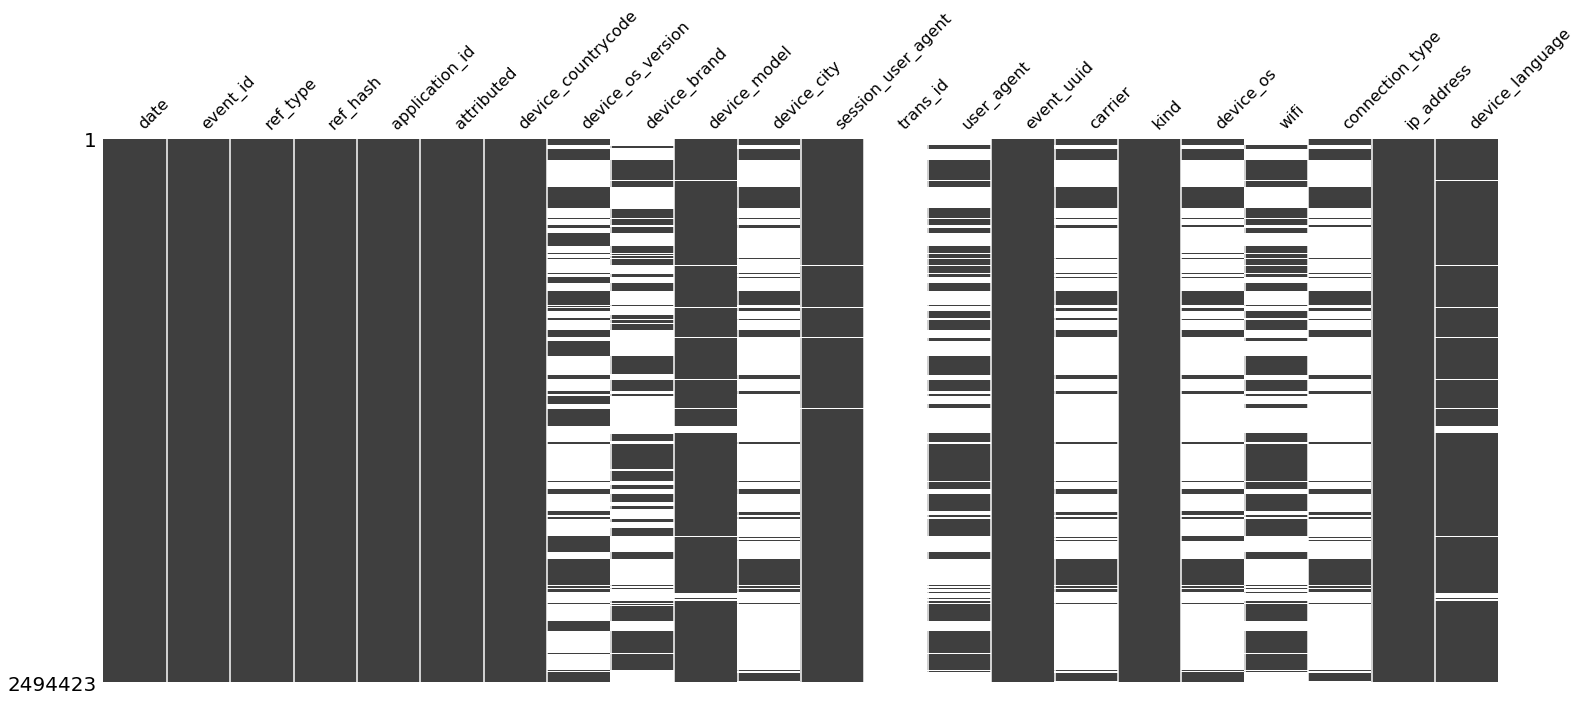

In [20]:
missingno.matrix(events, sparkline=False)
plt.savefig('../assets/events_missingno.png', bbox_inches='tight')

In [22]:
events.device_countrycode.unique()

array([6333597102633388268], dtype=int64)

In [23]:
events.date.describe()

count                       2494423
unique                          216
top       2019-03-07 21:00:00-03:00
freq                          27825
first     2019-03-04 21:00:00-03:00
last      2019-03-13 20:00:00-03:00
Name: date, dtype: object

In [24]:
events.groupby(events.date.dt.date).size()

date
2019-03-04     46898
2019-03-05    241672
2019-03-06    253172
2019-03-07    270073
2019-03-08    277004
2019-03-09    288378
2019-03-10    286213
2019-03-11    268453
2019-03-12    299502
2019-03-13    263058
dtype: int64

In [25]:
events.event_id.value_counts()

22     618228
31     417070
161    217846
1      157812
138    100039
162     84898
329     56490
156     53332
33      48581
171     43942
310     42101
155     38465
273     37056
23      35588
21      26228
98      24301
158     23738
272     22788
80      22076
50      20905
81      18622
346     14408
58      13940
51      13455
513     12682
354     11711
133     11074
256     10939
274     10035
60       9456
        ...  
500         1
511         1
532         1
516         1
132         1
520         1
521         1
523         1
575         1
577         1
578         1
579         1
608         1
433         1
597         1
436         1
589         1
588         1
587         1
586         1
585         1
140         1
583         1
581         1
580         1
437         1
443         1
227         1
226         1
584         1
Name: event_id, Length: 568, dtype: int64

In [28]:
events.wifi.sum()

930902

In [29]:
events.wifi.count()

1378872

In [31]:
events.wifi.shape

(2494423,)